In [14]:
import numpy as np
import pandas as pd

In [15]:
delivery= pd.read_csv('IPL_Ball_by_Ball_2008_2022_New.csv')
match = pd.read_csv('IPL_Matches_2008_2022_New.csv')

In [16]:
match.shape

(950, 20)

In [17]:
delivery

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,RR
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,RR
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,RR
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,RR
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,RR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,RCB
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,RCB
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,RCB
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,RCB


In [18]:
total_score_df = delivery.groupby(['ID','innings']).sum()['total_run'].reset_index()

In [19]:
total_score_df = total_score_df[total_score_df['innings'] == 1]
total_score_df.iloc[:,-1]=total_score_df.iloc[:,-1]+1

In [20]:
total_score_df

,ID,innings,total_run
0,335982,1,223
2,335983,1,241
4,335984,1,130
6,335985,1,166
8,335986,1,111
...,...,...,...
1918,1304116,1,158
1920,1312197,1,189
1922,1312198,1,208
1924,1312199,1,158


In [21]:
match_df = match.merge(total_score_df[['ID','total_run']],left_on='ID',right_on='ID')

In [22]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,29-05-2022,2022,Final,RR,GT,"Narendra Modi Stadium, Ahmedabad",RR,bat,...,GT,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,27-05-2022,2022,Qualifier 2,RCB,RR,"Narendra Modi Stadium, Ahmedabad",RR,field,...,RR,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,25-05-2022,2022,Eliminator,RCB,LSG,"Eden Gardens, Kolkata",LSG,field,...,RCB,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,24-05-2022,2022,Qualifier 1,RR,GT,"Eden Gardens, Kolkata",GT,field,...,GT,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,22-05-2022,2022,70,SRH,PBKS,"Wankhede Stadium, Mumbai",SRH,bat,...,PBKS,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,20-04-2008,2007/08,4,KKR,SRH,Eden Gardens,SRH,bat,...,KKR,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,111
946,335985,Mumbai,20-04-2008,2007/08,5,MI,RCB,Wankhede Stadium,MI,bat,...,RCB,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,166
947,335984,Delhi,19-04-2008,2007/08,3,DC,RR,Feroz Shah Kotla,RR,bat,...,DC,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,130
948,335983,Chandigarh,19-04-2008,2007/08,2,PBKS,CSK,"Punjab Cricket Association Stadium, Mohali",CSK,bat,...,CSK,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,241


In [23]:
match_df['Team1'].unique()

array(['RR', 'RCB', 'SRH', 'DC', 'CSK', 'GT', 'LSG', 'KKR', 'PBKS', 'MI',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [24]:
teams=[
    'MI','CSK','SRH','GT','RCB','KKR','PBKS','DC','LSG','RR'
]

In [25]:
# match_df['Team1']=match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
# match_df['Team1']=match_df['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
# match_df['Team1']=match_df['Team1'].str.replace('Kings XI Punjab','Punjab Kings')

In [26]:
match_df = match_df[match_df['Team1'].isin(teams)]
match_df = match_df[match_df['Team2'].isin(teams)]

In [27]:
match_df=match_df[match_df['WonBy']!='NoResults']

In [28]:
match_df=match_df[['ID','City','Team1','Team2','WinningTeam','total_run']]

In [29]:
match_df

,ID,City,Team1,Team2,WinningTeam,total_run
0,1312200,Ahmedabad,RR,GT,GT,131
1,1312199,Ahmedabad,RCB,RR,RR,158
2,1312198,Kolkata,RCB,LSG,RCB,208
3,1312197,Kolkata,RR,GT,GT,189
4,1304116,Mumbai,SRH,PBKS,PBKS,158
...,...,...,...,...,...,...
945,335986,Kolkata,KKR,SRH,KKR,111
946,335985,Mumbai,MI,RCB,RCB,166
947,335984,Delhi,DC,RR,DC,130
948,335983,Chandigarh,PBKS,CSK,CSK,241


In [30]:
delivery_df = match_df.merge(delivery,on='ID')

In [31]:
delivery_df = delivery_df[delivery_df['innings'] == 2]

In [32]:
# delivery_df['BowlingTeam'] = (delivery_df['Team1']+delivery_df['Team2'])

In [33]:
delivery_df['BowlingTeam']= delivery_df.apply(lambda x: (x['Team1']+ x['Team2']).replace(str(x['BattingTeam']),''),axis=1)

In [34]:
delivery_df

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
120,1312200,Ahmedabad,RR,GT,GT,131,2,0,1,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,GT,RR
121,1312200,Ahmedabad,RR,GT,GT,131,2,0,2,WP Saha,...,0,0,0,0,0,NaN,NaN,NaN,GT,RR
122,1312200,Ahmedabad,RR,GT,GT,131,2,0,3,WP Saha,...,1,0,1,0,0,NaN,NaN,NaN,GT,RR
123,1312200,Ahmedabad,RR,GT,GT,131,2,0,4,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,GT,RR
124,1312200,Ahmedabad,RR,GT,GT,131,2,0,5,Shubman Gill,...,0,0,0,0,0,NaN,NaN,NaN,GT,RR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198621,335982,Bengaluru,RCB,KKR,KKR,223,2,14,5,P Kumar,...,0,1,1,0,0,NaN,NaN,NaN,RCB,KKR
198622,335982,Bengaluru,RCB,KKR,KKR,223,2,14,6,SB Joshi,...,1,0,1,0,0,NaN,NaN,NaN,RCB,KKR
198623,335982,Bengaluru,RCB,KKR,KKR,223,2,14,7,P Kumar,...,0,0,0,0,0,NaN,NaN,NaN,RCB,KKR
198624,335982,Bengaluru,RCB,KKR,KKR,223,2,15,1,SB Joshi,...,0,1,1,0,0,NaN,NaN,NaN,RCB,KKR


In [35]:
delivery_df['current_score'] = delivery_df.groupby('ID')['total_run_y'].cumsum()

In [36]:
delivery_df['BattingTeam'].dtypes

dtype('O')

In [37]:
delivery_df

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score
120,1312200,Ahmedabad,RR,GT,GT,131,2,0,1,WP Saha,...,0,0,0,0,NaN,NaN,NaN,GT,RR,0
121,1312200,Ahmedabad,RR,GT,GT,131,2,0,2,WP Saha,...,0,0,0,0,NaN,NaN,NaN,GT,RR,0
122,1312200,Ahmedabad,RR,GT,GT,131,2,0,3,WP Saha,...,0,1,0,0,NaN,NaN,NaN,GT,RR,1
123,1312200,Ahmedabad,RR,GT,GT,131,2,0,4,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,GT,RR,1
124,1312200,Ahmedabad,RR,GT,GT,131,2,0,5,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,GT,RR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198621,335982,Bengaluru,RCB,KKR,KKR,223,2,14,5,P Kumar,...,1,1,0,0,NaN,NaN,NaN,RCB,KKR,80
198622,335982,Bengaluru,RCB,KKR,KKR,223,2,14,6,SB Joshi,...,0,1,0,0,NaN,NaN,NaN,RCB,KKR,81
198623,335982,Bengaluru,RCB,KKR,KKR,223,2,14,7,P Kumar,...,0,0,0,0,NaN,NaN,NaN,RCB,KKR,81
198624,335982,Bengaluru,RCB,KKR,KKR,223,2,15,1,SB Joshi,...,1,1,0,0,NaN,NaN,NaN,RCB,KKR,82


In [38]:
delivery_df['runs_left'] = delivery_df['total_run_x'] - delivery_df['current_score']

In [39]:
delivery_df

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left
120,1312200,Ahmedabad,RR,GT,GT,131,2,0,1,WP Saha,...,0,0,0,NaN,NaN,NaN,GT,RR,0,131
121,1312200,Ahmedabad,RR,GT,GT,131,2,0,2,WP Saha,...,0,0,0,NaN,NaN,NaN,GT,RR,0,131
122,1312200,Ahmedabad,RR,GT,GT,131,2,0,3,WP Saha,...,1,0,0,NaN,NaN,NaN,GT,RR,1,130
123,1312200,Ahmedabad,RR,GT,GT,131,2,0,4,Shubman Gill,...,0,0,0,NaN,NaN,NaN,GT,RR,1,130
124,1312200,Ahmedabad,RR,GT,GT,131,2,0,5,Shubman Gill,...,0,0,0,NaN,NaN,NaN,GT,RR,1,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198621,335982,Bengaluru,RCB,KKR,KKR,223,2,14,5,P Kumar,...,1,0,0,NaN,NaN,NaN,RCB,KKR,80,143
198622,335982,Bengaluru,RCB,KKR,KKR,223,2,14,6,SB Joshi,...,1,0,0,NaN,NaN,NaN,RCB,KKR,81,142
198623,335982,Bengaluru,RCB,KKR,KKR,223,2,14,7,P Kumar,...,0,0,0,NaN,NaN,NaN,RCB,KKR,81,142
198624,335982,Bengaluru,RCB,KKR,KKR,223,2,15,1,SB Joshi,...,1,0,0,NaN,NaN,NaN,RCB,KKR,82,141


In [40]:
delivery_df['balls_left'] = 126 - (delivery_df['overs']*6 + delivery_df['ballnumber'])

In [41]:
delivery_df

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left
120,1312200,Ahmedabad,RR,GT,GT,131,2,0,1,WP Saha,...,0,0,NaN,NaN,NaN,GT,RR,0,131,125
121,1312200,Ahmedabad,RR,GT,GT,131,2,0,2,WP Saha,...,0,0,NaN,NaN,NaN,GT,RR,0,131,124
122,1312200,Ahmedabad,RR,GT,GT,131,2,0,3,WP Saha,...,0,0,NaN,NaN,NaN,GT,RR,1,130,123
123,1312200,Ahmedabad,RR,GT,GT,131,2,0,4,Shubman Gill,...,0,0,NaN,NaN,NaN,GT,RR,1,130,122
124,1312200,Ahmedabad,RR,GT,GT,131,2,0,5,Shubman Gill,...,0,0,NaN,NaN,NaN,GT,RR,1,130,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198621,335982,Bengaluru,RCB,KKR,KKR,223,2,14,5,P Kumar,...,0,0,NaN,NaN,NaN,RCB,KKR,80,143,37
198622,335982,Bengaluru,RCB,KKR,KKR,223,2,14,6,SB Joshi,...,0,0,NaN,NaN,NaN,RCB,KKR,81,142,36
198623,335982,Bengaluru,RCB,KKR,KKR,223,2,14,7,P Kumar,...,0,0,NaN,NaN,NaN,RCB,KKR,81,142,35
198624,335982,Bengaluru,RCB,KKR,KKR,223,2,15,1,SB Joshi,...,0,0,NaN,NaN,NaN,RCB,KKR,82,141,35


In [42]:
delivery_df['player_out'] = delivery_df['player_out'].fillna("0")
delivery_df['player_out'] = delivery_df['player_out'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_out'] = delivery_df['player_out'].astype('int')

In [43]:
wickets = delivery_df.groupby('ID')['player_out'].cumsum().values

In [44]:
delivery_df['wickets'] = 10 - wickets

In [45]:
delivery_df

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets
120,1312200,Ahmedabad,RR,GT,GT,131,2,0,1,WP Saha,...,0,0,NaN,NaN,GT,RR,0,131,125,10
121,1312200,Ahmedabad,RR,GT,GT,131,2,0,2,WP Saha,...,0,0,NaN,NaN,GT,RR,0,131,124,10
122,1312200,Ahmedabad,RR,GT,GT,131,2,0,3,WP Saha,...,0,0,NaN,NaN,GT,RR,1,130,123,10
123,1312200,Ahmedabad,RR,GT,GT,131,2,0,4,Shubman Gill,...,0,0,NaN,NaN,GT,RR,1,130,122,10
124,1312200,Ahmedabad,RR,GT,GT,131,2,0,5,Shubman Gill,...,0,0,NaN,NaN,GT,RR,1,130,121,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198621,335982,Bengaluru,RCB,KKR,KKR,223,2,14,5,P Kumar,...,0,0,NaN,NaN,RCB,KKR,80,143,37,1
198622,335982,Bengaluru,RCB,KKR,KKR,223,2,14,6,SB Joshi,...,0,0,NaN,NaN,RCB,KKR,81,142,36,1
198623,335982,Bengaluru,RCB,KKR,KKR,223,2,14,7,P Kumar,...,0,0,NaN,NaN,RCB,KKR,81,142,35,1
198624,335982,Bengaluru,RCB,KKR,KKR,223,2,15,1,SB Joshi,...,0,0,NaN,NaN,RCB,KKR,82,141,35,1


In [46]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [47]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [50]:
import math
delivery_df['crr'] = delivery_df['crr'].apply(lambda x:0.0 if math.isinf(x) else x)

In [51]:
import math
delivery_df['rrr'] = delivery_df['rrr'].apply(lambda x:0.0 if math.isinf(x) else x)

In [52]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [53]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [54]:
delivery_df

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets,crr,rrr,result
120,1312200,Ahmedabad,RR,GT,GT,131,2,0,1,WP Saha,...,NaN,GT,RR,0,131,125,10,-0.000000,6.288000,1
121,1312200,Ahmedabad,RR,GT,GT,131,2,0,2,WP Saha,...,NaN,GT,RR,0,131,124,10,-0.000000,6.338710,1
122,1312200,Ahmedabad,RR,GT,GT,131,2,0,3,WP Saha,...,NaN,GT,RR,1,130,123,10,-2.000000,6.341463,1
123,1312200,Ahmedabad,RR,GT,GT,131,2,0,4,Shubman Gill,...,NaN,GT,RR,1,130,122,10,-3.000000,6.393443,1
124,1312200,Ahmedabad,RR,GT,GT,131,2,0,5,Shubman Gill,...,NaN,GT,RR,1,130,121,10,-6.000000,6.446281,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198621,335982,Bengaluru,RCB,KKR,KKR,223,2,14,5,P Kumar,...,NaN,RCB,KKR,80,143,37,1,5.783133,23.189189,0
198622,335982,Bengaluru,RCB,KKR,KKR,223,2,14,6,SB Joshi,...,NaN,RCB,KKR,81,142,36,1,5.785714,23.666667,0
198623,335982,Bengaluru,RCB,KKR,KKR,223,2,14,7,P Kumar,...,NaN,RCB,KKR,81,142,35,1,5.717647,24.342857,0
198624,335982,Bengaluru,RCB,KKR,KKR,223,2,15,1,SB Joshi,...,NaN,RCB,KKR,82,141,35,1,5.788235,24.171429,0


In [88]:
final_df = delivery_df[['BattingTeam','BowlingTeam','City','runs_left','current_score','balls_left','wickets','total_run_x','crr','rrr','result']]

In [89]:
final_df

,BattingTeam,BowlingTeam,City,runs_left,current_score,balls_left,wickets,total_run_x,crr,rrr,result
120,GT,RR,Ahmedabad,131,0,125,10,131,-0.000000,6.288000,1
121,GT,RR,Ahmedabad,131,0,124,10,131,-0.000000,6.338710,1
122,GT,RR,Ahmedabad,130,1,123,10,131,-2.000000,6.341463,1
123,GT,RR,Ahmedabad,130,1,122,10,131,-3.000000,6.393443,1
124,GT,RR,Ahmedabad,130,1,121,10,131,-6.000000,6.446281,1
...,...,...,...,...,...,...,...,...,...,...,...
198621,RCB,KKR,Bengaluru,143,80,37,1,223,5.783133,23.189189,0
198622,RCB,KKR,Bengaluru,142,81,36,1,223,5.785714,23.666667,0
198623,RCB,KKR,Bengaluru,142,81,35,1,223,5.717647,24.342857,0
198624,RCB,KKR,Bengaluru,141,82,35,1,223,5.788235,24.171429,0


In [90]:
final_df = final_df.sample(final_df.shape[0])


In [91]:
final_df.sample()

,BattingTeam,BowlingTeam,City,runs_left,current_score,balls_left,wickets,total_run_x,crr,rrr,result
3612,RCB,PBKS,Mumbai,118,92,68,7,210,10.615385,10.411765,0


In [92]:
final_df = final_df[final_df['balls_left'] != 0]


In [93]:
final_df = final_df.dropna()

In [165]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [166]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False),['BattingTeam','BowlingTeam','City'])
]
,remainder='passthrough')

In [167]:
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [168]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [169]:
final_df.isna().sum()

BattingTeam      0
BowlingTeam      0
City             0
runs_left        0
current_score    0
balls_left       0
wickets          0
total_run_x      0
crr              0
rrr              0
result           0
dtype: int64

In [170]:
X_train

,BattingTeam,BowlingTeam,City,runs_left,current_score,balls_left,wickets,total_run_x,crr,rrr
186192,MI,RCB,Bengaluru,113,10,118,10,123,30.000000,5.745763
117632,RCB,DC,Sharjah,83,63,72,8,146,7.875000,6.916667
20024,RCB,SRH,Abu Dhabi,77,65,67,7,142,7.358491,6.895522
147518,RCB,CSK,Bengaluru,89,40,91,9,129,8.275862,5.868132
144697,MI,SRH,Visakhapatnam,108,31,86,8,139,5.470588,7.534884
...,...,...,...,...,...,...,...,...,...,...
133392,MI,RR,Jaipur,102,61,80,10,163,9.150000,7.650000
19581,RR,KKR,Sharjah,138,34,78,4,172,4.857143,10.615385
169471,DC,MI,Delhi,192,27,112,10,219,20.250000,10.285714
130164,CSK,PBKS,Chandigarh,133,6,120,10,139,0.000000,6.650000


In [171]:
X_test

,BattingTeam,BowlingTeam,City,runs_left,current_score,balls_left,wickets,total_run_x,crr,rrr
154828,RCB,CSK,Chennai,100,84,56,6,184,7.875000,10.714286
57469,SRH,DC,Delhi,10,120,20,5,130,7.200000,3.000000
173167,KKR,RR,Durban,64,38,68,5,102,4.384615,5.647059
67983,RR,DC,Delhi,176,21,115,10,197,25.200000,9.182609
26895,CSK,SRH,Delhi,131,41,97,10,172,10.695652,8.103093
...,...,...,...,...,...,...,...,...,...,...
124012,PBKS,CSK,Chennai,17,170,9,5,187,9.189189,11.333333
6451,PBKS,GT,Navi Mumbai,63,81,62,9,144,8.379310,6.096774
80665,PBKS,DC,Delhi,108,81,54,5,189,7.363636,12.000000
168111,DC,SRH,Cuttack,75,97,54,8,172,8.818182,8.333333


In [172]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [173]:
y_pred = pipe.predict(X_test)
print(y_pred)


[0 1 0 ... 0 0 0]


In [177]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8052746794537684

In [178]:
pipe.predict_proba(X_test)[10]

array([0.9665026, 0.0334974])

In [179]:
def match_summary(row):
    print("Batting Team-" + row['BattingTeam'] + " | Bowling Team-" + row['BowlingTeam'] + " | Target- " + str(row['total_run_x']))

In [180]:
 delivery_df.head()

,ID,City,Team1,Team2,WinningTeam,total_run_x,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets,crr,rrr,result
120,1312200,Ahmedabad,RR,GT,GT,131,2,0,1,WP Saha,...,NaN,GT,RR,0,131,125,10,-0.0,6.288000,1
121,1312200,Ahmedabad,RR,GT,GT,131,2,0,2,WP Saha,...,NaN,GT,RR,0,131,124,10,-0.0,6.338710,1
122,1312200,Ahmedabad,RR,GT,GT,131,2,0,3,WP Saha,...,NaN,GT,RR,1,130,123,10,-2.0,6.341463,1
123,1312200,Ahmedabad,RR,GT,GT,131,2,0,4,Shubman Gill,...,NaN,GT,RR,1,130,122,10,-3.0,6.393443,1
124,1312200,Ahmedabad,RR,GT,GT,131,2,0,5,Shubman Gill,...,NaN,GT,RR,1,130,121,10,-6.0,6.446281,1


In [182]:

def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['ID'] == match_id]
    match = match[(match['ballnumber'] == 6)]
    temp_df = match[['ID','BattingTeam','BowlingTeam','City','runs_left','current_score','balls_left','wickets','total_run_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    # print(temp_df.head())
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_run_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','current_score','total_run_x','lose','win']]
    return temp_df,target

In [183]:
temp_df,target =match_progression(delivery_df,1304083,pipe)
temp_df

Target- 169


,end_of_over,runs_after_over,wickets_in_over,current_score,total_run_x,lose,win
9110,1,7,0,7,169,81.8,18.2
9118,2,5,0,12,169,81.4,18.6
9124,3,6,0,18,169,80.7,19.3
9130,4,5,0,23,169,80.8,19.2
9136,5,8,0,31,169,78.5,21.5
9142,6,12,0,43,169,71.5,28.5
9148,7,6,0,49,169,70.9,29.1
9154,8,5,1,54,169,82.0,18.0
9160,9,2,1,56,169,91.4,8.6
9166,10,3,1,59,169,96.0,4.0


Text(0.5, 1.0, 'Target-169')

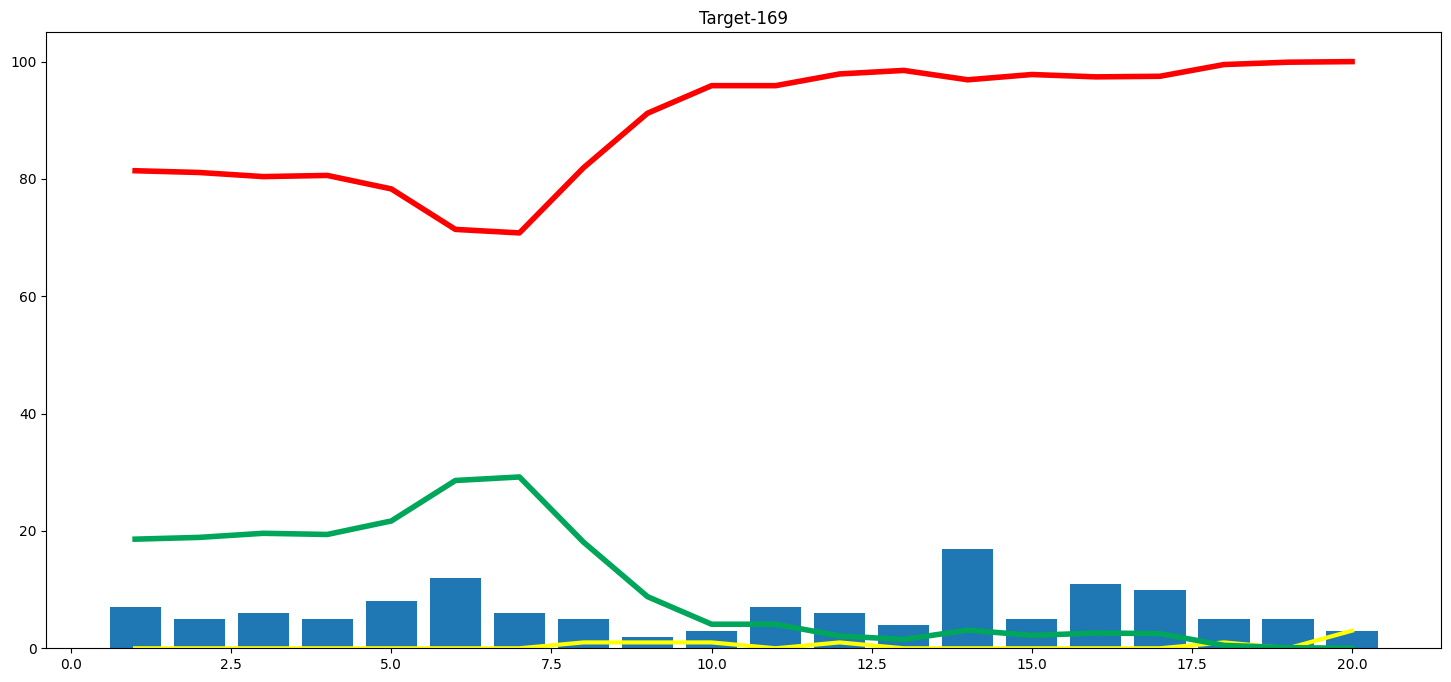

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [62]:
import pickle
pickle.dump(pipe,open('pipeProject.pkl','wb'))

In [63]:
teams

['MI', 'CSK', 'SRH', 'GT', 'RCB', 'KKR', 'PBKS', 'DC', 'LSG', 'RR']

In [64]:
delivery_df['City'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Raipur', 'Ranchi', 'Cuttack', 'Dharamsala', 'Nagpur',
       'Johannesburg', 'Centurion', 'Durban', 'Bloemfontein',
       'Port Elizabeth', 'Kimberley', 'East London', 'Cape Town'],
      dtype=object)

In [65]:
X

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets,total_run_x,crr,rrr
147525,RCB,CSK,Bengaluru,81,84,9,129,8.000000,5.785714
6163,CSK,RCB,Pune,144,100,10,174,9.000000,8.640000
126643,PBKS,DC,Delhi,20,41,6,121,7.670886,2.926829
195227,RCB,CSK,Bengaluru,167,113,10,179,10.285714,8.867257
30833,RR,DC,Mumbai,33,23,3,148,7.113402,8.608696
...,...,...,...,...,...,...,...,...,...
145184,SRH,CSK,Visakhapatnam,161,97,9,194,8.608696,9.958763
168776,CSK,DC,Delhi,178,119,10,186,48.000000,8.974790
156788,RR,SRH,Hyderabad,-3,13,8,138,7.906542,-1.384615
149760,RR,CSK,Jaipur,169,102,9,197,9.333333,9.941176


In [66]:
y

147525    1
6163      0
126643    1
195227    0
30833     1
         ..
145184    0
168776    1
156788    1
149760    0
164615    0
Name: result, Length: 95925, dtype: int64